<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4: Modeling Prediction Dengue Cases in Singapore

### Import library

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from itertools import product

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso , Ridge
from sklearn.model_selection import train_test_split

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import itertools

import matplotlib.pyplot as plt

In [2]:
#Loading Data
df = pd.read_csv('../data/weekly_data.csv')
df2= pd.read_csv('../data/weekly_data.csv')
df3= pd.read_csv('../data/weekly_data.csv')
df4= pd.read_csv('../data/weekly_data.csv')

In [3]:
df.head(11)

,Unnamed: 0,total_rainfall,mean_temperature,minimum_temperature,minimum_temperature_mean,maximum_temperature,maximum_temperature_mean,mean_wind_speed,max_wind_speed,max_wind_speed_mean,dengue_cases,interest,inbound,outbound,year,week,cumulative_total_rainfall,cumulative_dengue_cases
0,2012-W01,106.8,26.762500,22.2,24.462500,31.4,31.4,11.487500,37.1,34.237500,74,8,239701,115076,2012,1,106.8,74
1,2012-W02,25.8,26.228571,22.1,23.828571,32.3,32.3,7.814286,64.8,34.214286,66,8,239701,115076,2012,2,132.6,140
2,2012-W03,28.0,26.914286,22.9,24.471429,32.5,32.5,7.357143,33.8,28.042857,61,6,239701,115076,2012,3,160.6,201
3,2012-W04,8.6,26.600000,23.5,24.400000,31.6,31.6,8.585714,34.6,30.857143,52,10,239701,115076,2012,4,169.2,253
4,2012-W05,55.7,26.485714,21.5,23.942857,31.6,31.6,10.542857,40.3,33.171429,85,7,239701,115076,2012,5,224.9,338
5,2012-W06,1.6,27.500000,24.4,24.814286,32.3,32.3,11.900000,40.7,34.400000,87,5,283638,132094,2012,6,226.5,425
6,2012-W07,38.2,26.671429,22.7,23.971429,31.9,31.9,7.914286,42.1,30.942857,65,6,283638,132094,2012,7,264.7,490
7,2012-W08,3.2,27.700000,24.8,25.471429,32.6,32.6,9.814286,36.4,29.471429,51,9,283638,132094,2012,8,267.9,541
8,2012-W09,26.4,27.142857,23.8,24.971429,33.2,33.2,7.542857,53.3,33.814286,55,6,283638,132094,2012,9,294.3,596
9,2012-W10,52.6,26.928571,21.1,24.128571,31.5,31.5,6.442857,41.4,31.985714,46,5,310783,171836,2012,10,346.9,642


In [4]:
df.tail(20)

,Unnamed: 0,total_rainfall,mean_temperature,minimum_temperature,minimum_temperature_mean,maximum_temperature,maximum_temperature_mean,mean_wind_speed,max_wind_speed,max_wind_speed_mean,dengue_cases,interest,inbound,outbound,year,week,cumulative_total_rainfall,cumulative_dengue_cases
552,2022-W33,29.4,28.385714,24.0,26.042857,32.6,32.6,9.314286,53.7,36.757143,679,52,145749,87838,2022,33,1140.4,24854
553,2022-W34,54.6,27.357143,23.7,24.771429,31.9,31.9,7.542857,38.9,31.757143,662,46,145749,87838,2022,34,1195.0,25516
554,2022-W35,10.8,27.828571,24.7,25.842857,32.5,32.5,6.671429,35.2,31.742857,581,51,145749,87838,2022,35,1205.8,26097
555,2022-W36,9.4,27.885714,24.8,25.614286,32.4,32.4,7.685714,42.6,31.214286,570,40,195554,136038,2022,36,1215.2,26667
556,2022-W37,27.4,27.671429,23.5,25.400000,31.9,31.9,8.171429,51.9,35.714286,544,44,195554,136038,2022,37,1242.6,27211
557,2022-W38,51.0,27.771429,22.7,24.714286,32.0,32.0,6.785714,42.6,32.528571,472,35,195554,136038,2022,38,1293.6,27683
558,2022-W39,58.4,28.171429,22.4,24.828571,32.9,32.9,6.914286,42.4,30.771429,426,34,195554,136038,2022,39,1352.0,28109
559,2022-W40,42.0,26.928571,23.8,24.742857,32.5,32.5,5.314286,38.9,27.871429,397,29,163367,113473,2022,40,1394.0,28506
560,2022-W41,43.4,27.842857,23.5,24.785714,33.4,33.4,6.514286,40.4,31.414286,376,40,163367,113473,2022,41,1437.4,28882
561,2022-W42,61.4,27.814286,23.1,25.028571,33.0,33.0,6.057143,31.7,26.242857,373,35,163367,113473,2022,42,1498.8,29255


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 572 non-null    object 
 1   total_rainfall             572 non-null    float64
 2   mean_temperature           572 non-null    float64
 3   minimum_temperature        572 non-null    float64
 4   minimum_temperature_mean   572 non-null    float64
 5   maximum_temperature        572 non-null    float64
 6   maximum_temperature_mean   572 non-null    float64
 7   mean_wind_speed            572 non-null    float64
 8   max_wind_speed             572 non-null    float64
 9   max_wind_speed_mean        572 non-null    float64
 10  dengue_cases               572 non-null    int64  
 11  interest                   572 non-null    int64  
 12  inbound                    572 non-null    int64  
 13  outbound                   572 non-null    int64  

In [6]:
df.set_index(df['Unnamed: 0'],inplace=True)

In [7]:
df.drop(columns='Unnamed: 0',inplace=True)

conduct data shift as we are unbale to use current month data to predict current month dengue cases, therefor we will be using data from pervious month to train the model

In [8]:
#shift feature by 10 week
df['mean_temperature'] = df['mean_temperature'].shift(10)
df['total_rainfall'] = df['total_rainfall'].shift(10)
df['interest'] = df['interest'].shift(10)
df['minimum_temperature'] = df['minimum_temperature'].shift(10)
df['maximum_temperature'] = df['maximum_temperature'].shift(10)
df['inbound'] = df['inbound'].shift(10)
df['outbound'] = df['outbound'].shift(10)

# Drop any rows with missing values
df.dropna(inplace=True)

In [9]:
df.head(20)

,total_rainfall,mean_temperature,minimum_temperature,minimum_temperature_mean,maximum_temperature,maximum_temperature_mean,mean_wind_speed,max_wind_speed,max_wind_speed_mean,dengue_cases,interest,inbound,outbound,year,week,cumulative_total_rainfall,cumulative_dengue_cases
Unnamed: 0,,,,,,,,,,,,,,,,,
2012-W11,106.8,26.762500,22.2,24.314286,31.4,32.1,8.385714,36.7,31.371429,64,8.0,239701.0,115076.0,2012,11,472.3,706
2012-W12,25.8,26.228571,22.1,25.128571,32.3,32.4,6.300000,45.7,30.271429,73,8.0,239701.0,115076.0,2012,12,479.3,779
2012-W13,28.0,26.914286,22.9,24.142857,32.5,32.8,6.600000,56.9,36.757143,48,6.0,239701.0,115076.0,2012,13,606.3,827
2012-W14,8.6,26.600000,23.5,24.142857,31.6,31.7,6.571429,50.0,35.014286,52,10.0,239701.0,115076.0,2012,14,637.1,879
2012-W15,55.7,26.485714,21.5,24.271429,31.6,31.9,6.500000,39.2,30.328571,82,7.0,239701.0,115076.0,2012,15,791.5,961
2012-W16,1.6,27.500000,24.4,24.942857,32.3,32.7,6.071429,39.2,29.928571,77,5.0,283638.0,132094.0,2012,16,836.9,1038
2012-W17,38.2,26.671429,22.7,25.628571,31.9,32.9,6.414286,38.2,31.385714,64,6.0,283638.0,132094.0,2012,17,839.5,1102
2012-W18,3.2,27.700000,24.8,24.085714,32.6,32.5,5.871429,53.6,36.000000,88,9.0,283638.0,132094.0,2012,18,958.3,1190
2012-W19,26.4,27.142857,23.8,24.314286,33.2,33.7,6.457143,46.4,33.628571,97,6.0,283638.0,132094.0,2012,19,1006.7,1287


In [10]:
df.tail(20)

,total_rainfall,mean_temperature,minimum_temperature,minimum_temperature_mean,maximum_temperature,maximum_temperature_mean,mean_wind_speed,max_wind_speed,max_wind_speed_mean,dengue_cases,interest,inbound,outbound,year,week,cumulative_total_rainfall,cumulative_dengue_cases
Unnamed: 0,,,,,,,,,,,,,,,,,
2022-W33,75.4,27.814286,22.9,26.042857,33.6,32.6,9.314286,53.7,36.757143,679,91.0,135933.0,119020.0,2022,33,1140.4,24854
2022-W34,7.8,27.900000,23.9,24.771429,31.9,31.9,7.542857,38.9,31.757143,662,87.0,135933.0,119020.0,2022,34,1195.0,25516
2022-W35,44.2,27.542857,23.5,25.842857,31.9,32.5,6.671429,35.2,31.742857,581,88.0,135933.0,119020.0,2022,35,1205.8,26097
2022-W36,14.8,28.628571,23.9,25.614286,32.4,32.4,7.685714,42.6,31.214286,570,83.0,135933.0,119020.0,2022,36,1215.2,26667
2022-W37,25.6,28.542857,24.4,25.400000,32.5,31.9,8.171429,51.9,35.714286,544,82.0,181685.0,105543.0,2022,37,1242.6,27211
2022-W38,28.4,29.071429,23.6,24.714286,32.9,32.0,6.785714,42.6,32.528571,472,72.0,181685.0,105543.0,2022,38,1293.6,27683
2022-W39,42.2,28.442857,22.2,24.828571,32.9,32.9,6.914286,42.4,30.771429,426,65.0,181685.0,105543.0,2022,39,1352.0,28109
2022-W40,45.2,28.171429,23.9,24.742857,32.4,32.5,5.314286,38.9,27.871429,397,64.0,181685.0,105543.0,2022,40,1394.0,28506
2022-W41,17.2,27.842857,24.2,24.785714,32.2,33.4,6.514286,40.4,31.414286,376,62.0,145749.0,87838.0,2022,41,1437.4,28882


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 562 entries, 2012-W11 to 2022-W52
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   total_rainfall             562 non-null    float64
 1   mean_temperature           562 non-null    float64
 2   minimum_temperature        562 non-null    float64
 3   minimum_temperature_mean   562 non-null    float64
 4   maximum_temperature        562 non-null    float64
 5   maximum_temperature_mean   562 non-null    float64
 6   mean_wind_speed            562 non-null    float64
 7   max_wind_speed             562 non-null    float64
 8   max_wind_speed_mean        562 non-null    float64
 9   dengue_cases               562 non-null    int64  
 10  interest                   562 non-null    float64
 11  inbound                    562 non-null    float64
 12  outbound                   562 non-null    float64
 13  year                       562 non-null    

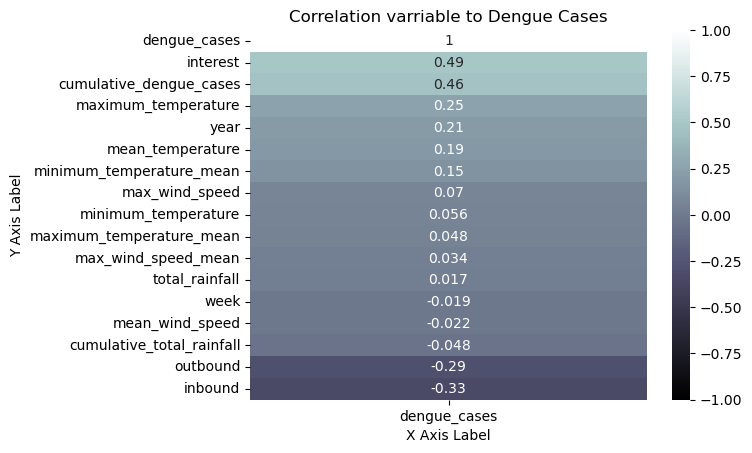

In [12]:
# Define custom y-axis tick labels
yticklabels = df['dengue_cases']

# Create a heatmap using seaborn with custom y-axis tick labels
#sns.heatmap(df.drop(columns='Unnamed: 0', inplace=False), annot=True, cmap='coolwarm', yticklabels=yticklabels)
sns.heatmap(df.corr(method='pearson',numeric_only=True)[['dengue_cases']].sort_values(by='dengue_cases', ascending=False), 
                      vmin=-1, vmax=1, annot=True, cmap='bone')

# Add labels and title
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Correlation varriable to Dengue Cases')

# Display the heatmap
plt.show()

From this heatmap we are able to tell that variables: interest, mean temperature, inbound and outbound has some correlation to Dengue Cases 

In [13]:
#function to plot 
def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18);

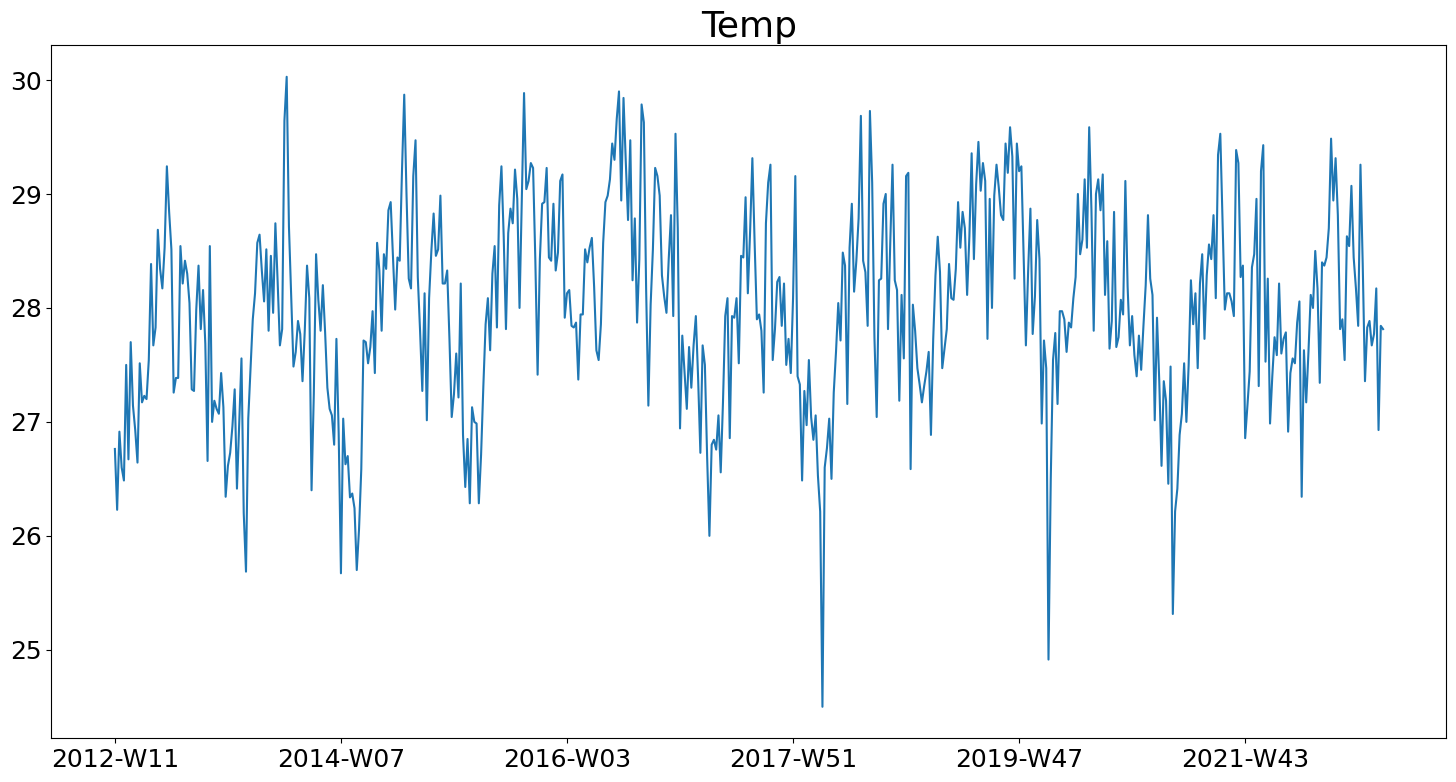

In [14]:
plot_series(df,['mean_temperature'], title='Temp', steps =100)

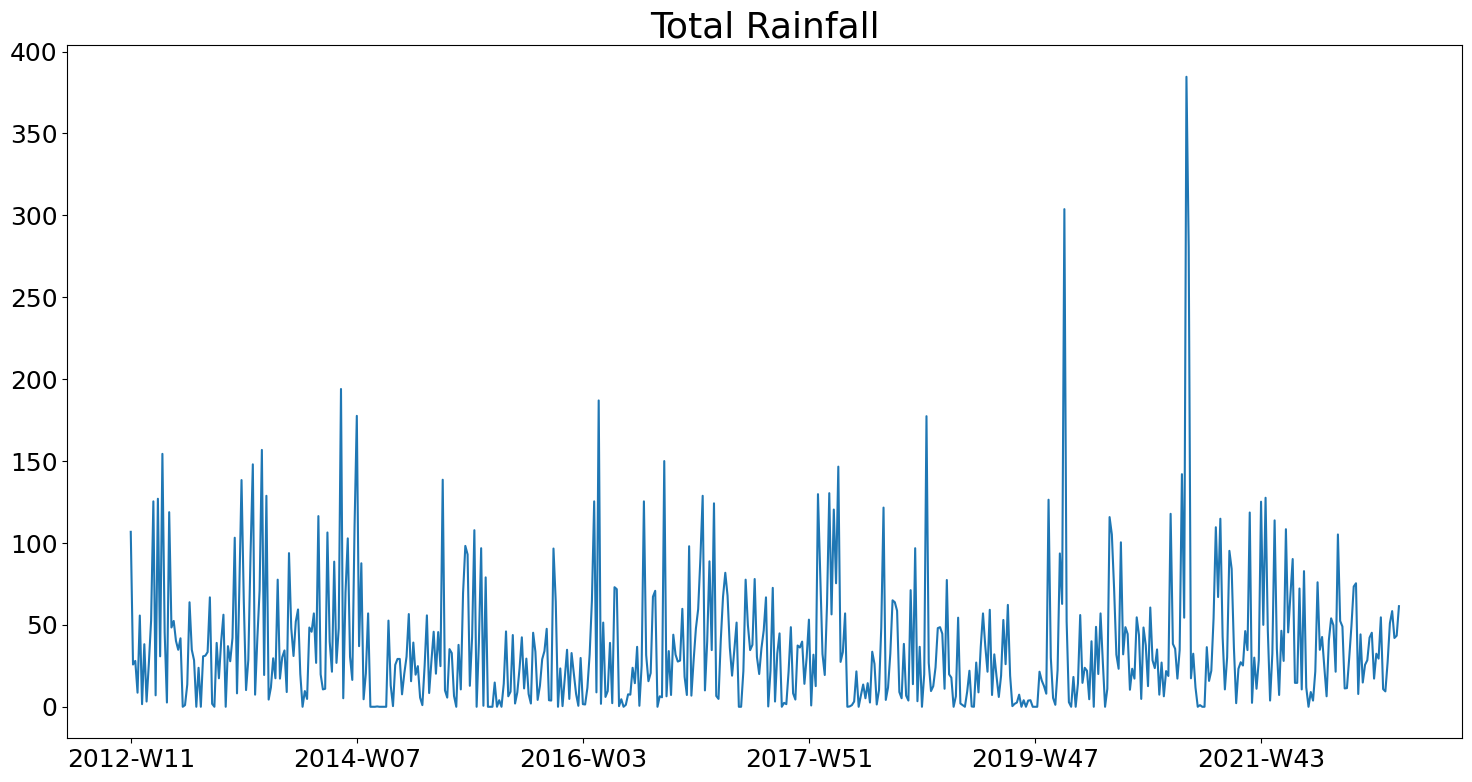

In [15]:
plot_series(df,['total_rainfall'], title='Total Rainfall', steps =100)

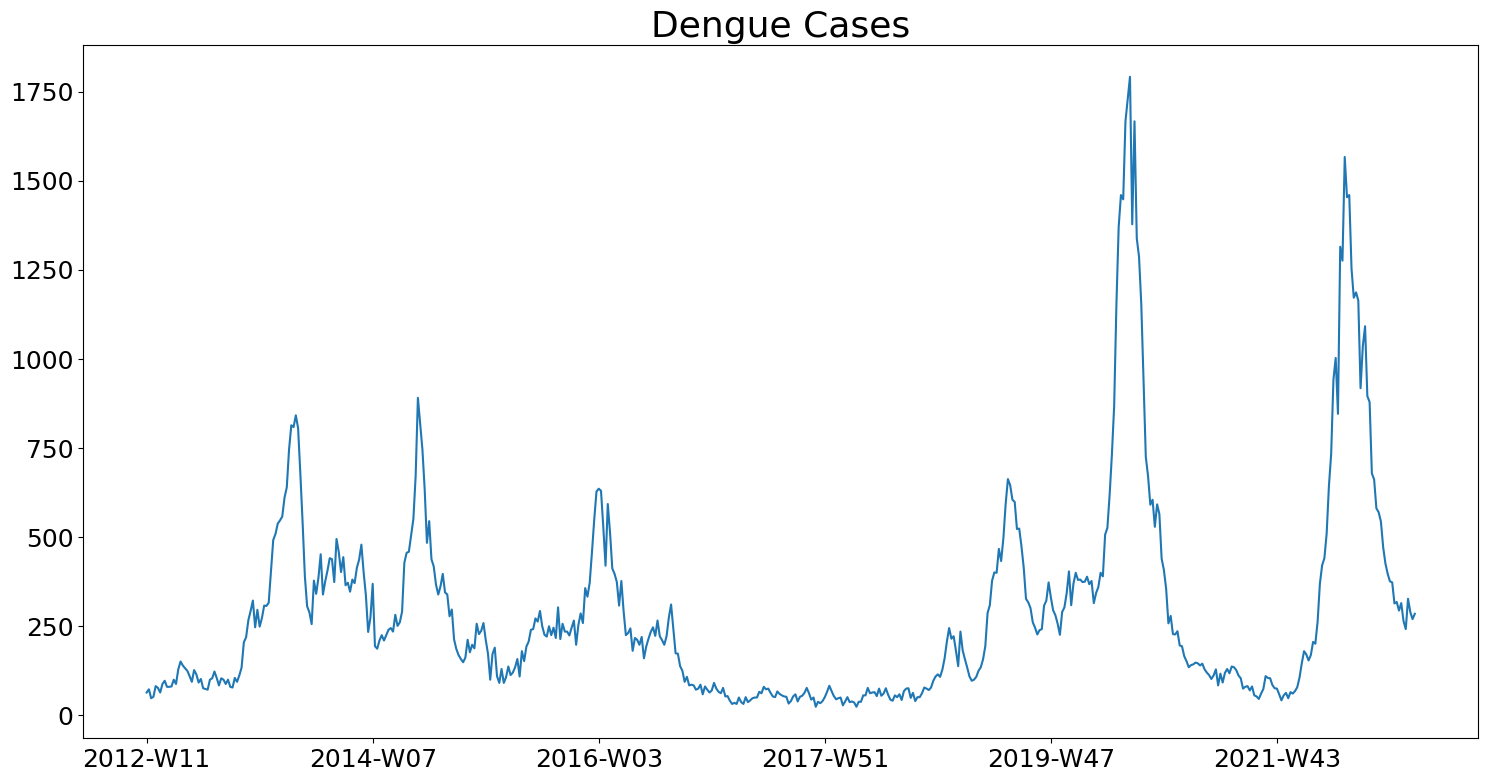

In [16]:
plot_series(df,['dengue_cases'], title='Dengue Cases', steps =100)

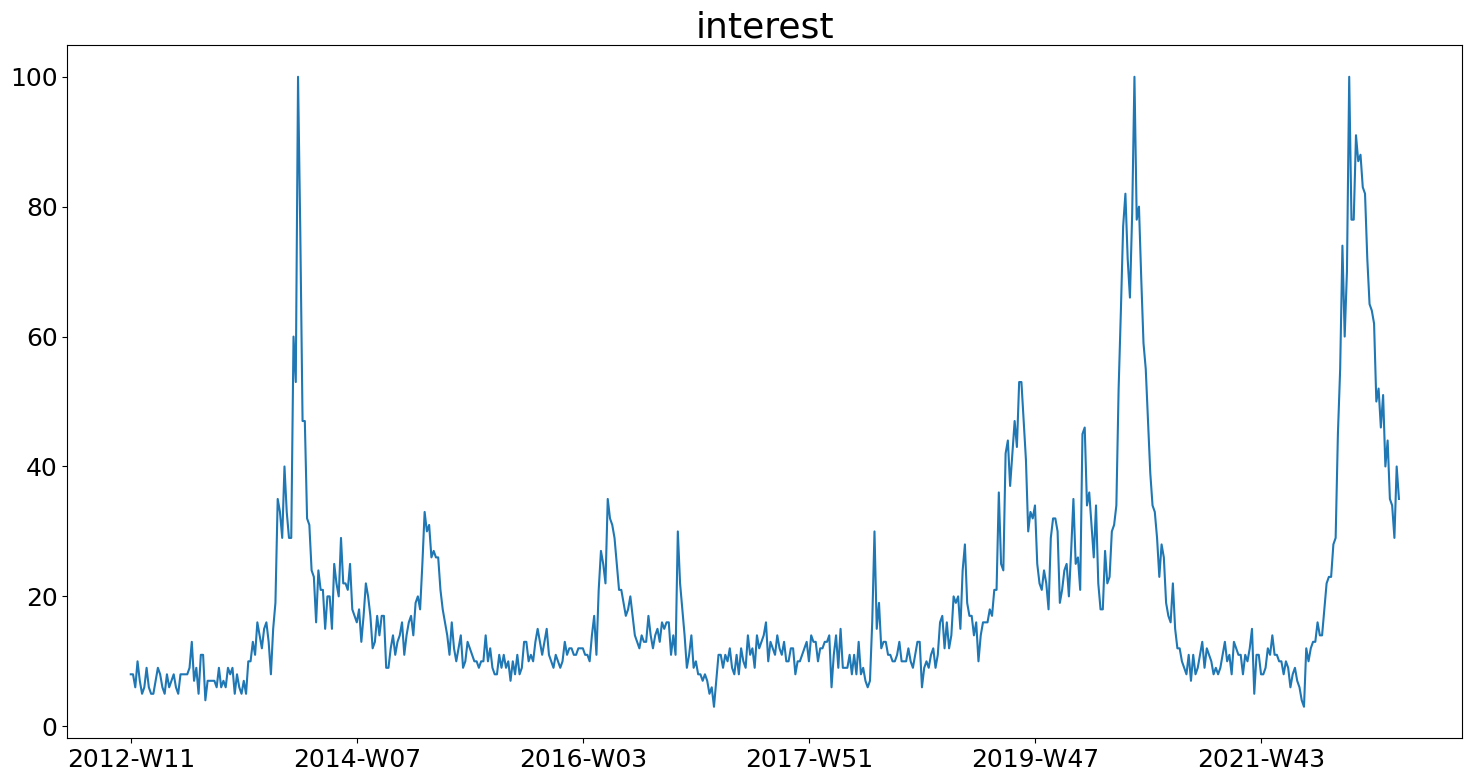

In [17]:
plot_series(df,['interest'], title='interest', steps =100)

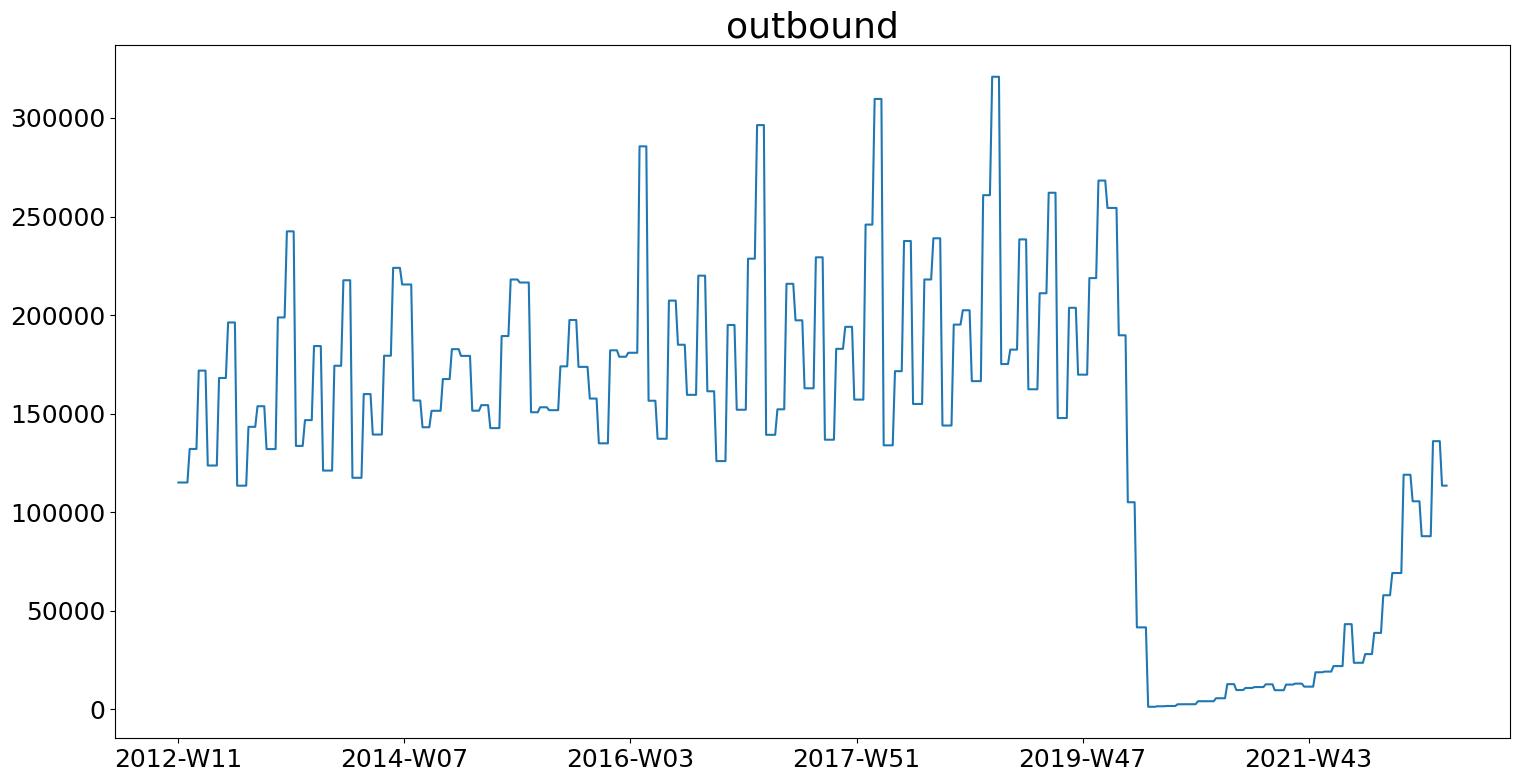

In [18]:
plot_series(df,['outbound'], title='outbound', steps =100)

create first and second different to check stationary

In [19]:
df['first_diff_dengue'] = df['dengue_cases'].diff()
df['second_diff_dengue'] = df['dengue_cases'].diff().diff()

In [20]:
adfuller(df['mean_temperature'])

(-5.3189203121406345,
 5.00255395497171e-06,
 4,
 557,
 {'1%': -3.4421447800270673,
  '5%': -2.8667429272780858,
  '10%': -2.5695409929766093},
 1040.5961070301323)

In [21]:
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [22]:
interpret_dftest(adfuller(df['dengue_cases']))

Test Statistic   -3.698918
p-value           0.004128
dtype: float64

In [23]:
interpret_dftest(adfuller(df['first_diff_dengue'].dropna()))

Test Statistic   -7.675585e+00
p-value           1.552003e-11
dtype: float64

In [24]:
interpret_dftest(adfuller(df['second_diff_dengue'].dropna()))

Test Statistic   -9.017411e+00
p-value           5.899255e-15
dtype: float64

From this interpret, we can conduct one diffencing is enough

In [25]:
Weekly_dengue = pd.DataFrame(df['dengue_cases'])
Weekly_dengue

,dengue_cases
Unnamed: 0,
2012-W11,64
2012-W12,73
2012-W13,48
2012-W14,52
2012-W15,82
...,...
2022-W48,242
2022-W49,327
2022-W50,290


### Finding must way to split the data

In [26]:
print(f'Number of observations: {round(len(Weekly_dengue))} ')
print(f'Number of training observations: {round(len(Weekly_dengue) * 0.75)}')
print(f'Number of testing observations: {len(Weekly_dengue) - round(len(Weekly_dengue) * 0.75)}')

Number of observations: 562 
Number of training observations: 422
Number of testing observations: 140


In [27]:
print(f'Number of observations: {round(len(df))} ')
print(f'Number of training observations: {round(len(df) * 0.85)}')
print(f'Number of testing observations: {len(df) - round(len(df) * 0.85)}')

#train = Weekly_dengue.iloc[:430,]
#test = Weekly_dengue.iloc[430:,]

Number of observations: 562 
Number of training observations: 478
Number of testing observations: 84


In [28]:
print(f'Number of observations: {round(len(df))} ')
print(f'Number of training observations: {round(len(df) * 0.9)}')
print(f'Number of testing observations: {len(df) - round(len(df) * 0.9)}')

#train = Weekly_dengue.iloc[:509,]
#test = Weekly_dengue.iloc[508:,]

Number of observations: 562 
Number of training observations: 506
Number of testing observations: 56


In [29]:
Weekly_dengue.tail()

,dengue_cases
Unnamed: 0,
2022-W48,242
2022-W49,327
2022-W50,290
2022-W51,270
2022-W52,285


we will use 10 year of data to predict 1 year data

### Create function for vision on train and pred vs actual data

In [30]:
def actual_pred_plot(actual, pred):
    """
    Function to return plot with 2 line of : actual data, predited data
    
    Parameters
    ----------

    
    actual: pandas Dataframe
        whole orignal dataset
        
    pred: pandas Dataframe
        pred dataset
        
    Returns
    -------
    plot
    
    """
    plt.figure(figsize=(16, 8))
    plt.plot(pred, c='orange',label='Predicted');
    plt.plot(actual, color = 'blue',label='Actual Data Set')
    plt.legend()

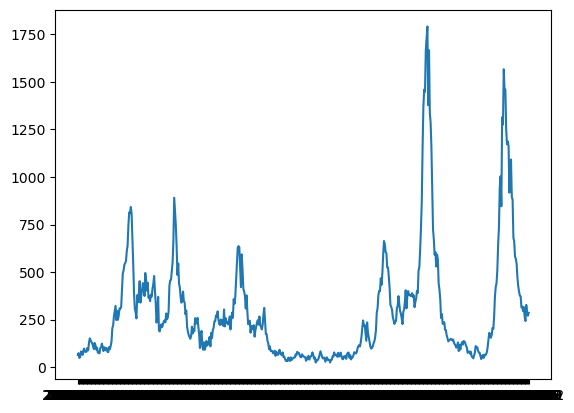

In [31]:
plt.plot(df['dengue_cases'])

In [32]:
df2

,Unnamed: 0,total_rainfall,mean_temperature,minimum_temperature,minimum_temperature_mean,maximum_temperature,maximum_temperature_mean,mean_wind_speed,max_wind_speed,max_wind_speed_mean,dengue_cases,interest,inbound,outbound,year,week,cumulative_total_rainfall,cumulative_dengue_cases
0,2012-W01,106.8,26.762500,22.2,24.462500,31.4,31.4,11.487500,37.1,34.237500,74,8,239701,115076,2012,1,106.8,74
1,2012-W02,25.8,26.228571,22.1,23.828571,32.3,32.3,7.814286,64.8,34.214286,66,8,239701,115076,2012,2,132.6,140
2,2012-W03,28.0,26.914286,22.9,24.471429,32.5,32.5,7.357143,33.8,28.042857,61,6,239701,115076,2012,3,160.6,201
3,2012-W04,8.6,26.600000,23.5,24.400000,31.6,31.6,8.585714,34.6,30.857143,52,10,239701,115076,2012,4,169.2,253
4,2012-W05,55.7,26.485714,21.5,23.942857,31.6,31.6,10.542857,40.3,33.171429,85,7,239701,115076,2012,5,224.9,338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,2022-W48,96.8,27.057143,22.8,24.128571,32.9,32.9,6.900000,35.2,32.285714,242,19,204085,185454,2022,48,1959.0,31003
568,2022-W49,65.6,26.800000,23.9,24.800000,32.7,32.7,6.357143,35.2,26.971429,327,27,232834,250220,2022,49,2024.6,31330
569,2022-W50,81.8,26.414286,23.9,24.314286,32.2,32.2,8.628571,42.6,28.314286,290,30,232834,250220,2022,50,2106.4,31620
570,2022-W51,10.2,26.685714,23.4,24.442857,31.7,31.7,10.214286,40.7,34.114286,270,20,232834,250220,2022,51,2116.6,31890


In [33]:
df3['dengue_cases']=df2['dengue_cases'].shift(10)
df3.dropna(inplace=True)

In [34]:
df3
df3 = df3.reset_index(drop=True)

# Model

### Linear model

Mean Squared Error: 45923.26685955319
Root Mean Squared Error : 214.2971461768756
r2 score:0.7763943818033835
MAE: 161.10490292344394
[array([48.51020275,  0.76724086,  9.14765095])]


Text(0, 0.5, 'Dengue_cases')

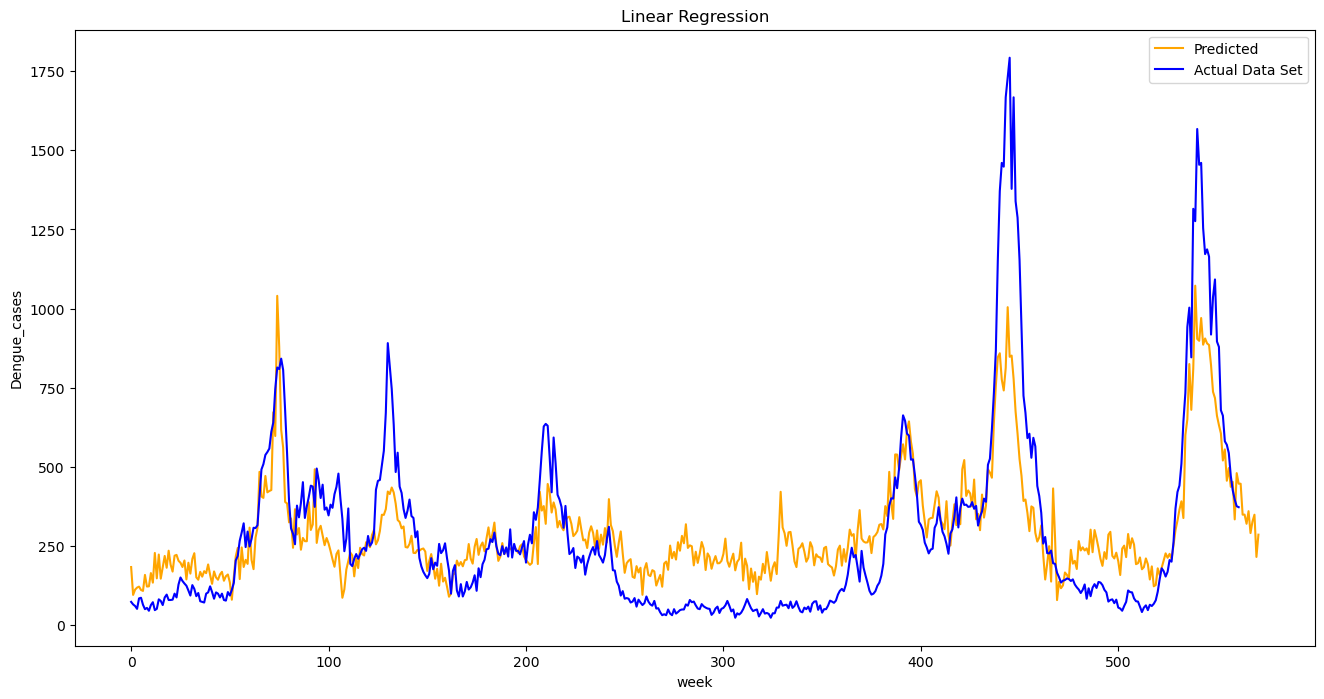

In [35]:
# Step 1 : Set columns for y and X


y = df['dengue_cases'].values.reshape(-1, 1)  # Input feature, reshaped to a 2D array
X = df[['mean_temperature','total_rainfall','interest']].values  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#X_test= test[['mean_temperature','total_rainfall', 'interest']].values
#y_test= test['dengue_cases'].values.reshape(-1, 1)

#X_train= train[['mean_temperature','total_rainfall', 'interest']].values
#y_train= train['dengue_cases'].values.reshape(-1, 1)

# Step 3: Create and train the linear regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

df2X=df2[['mean_temperature','total_rainfall', 'interest']].values  # Target variable
df2y=df2['dengue_cases'].values.reshape(-1, 1)
df3y=df3['dengue_cases'].values.reshape(-1, 1)

# Step 4: Make predictions on the test set
y_pred_lr = model_lr.predict(df2X[504:562])

#predict on unseen data
y_pred_lr_10week= model_lr.predict(df2X[0:572])

# Step 5: Evaluate the model
mse_lr = mean_squared_error(df3y[504:562], y_pred_lr)
print(f'Mean Squared Error: {mse_lr}')

rmse_lr= np.sqrt(mse_lr)
print(f'Root Mean Squared Error : {rmse_lr}')

r2_lr = r2_score(df3y[504:562], y_pred_lr)
print(f'r2 score:{r2_lr}')

mae_lr = mean_absolute_error(df3y[504:562], y_pred_lr)
print(f'MAE: {mae_lr}')

#coef
coef_lr=list(model_lr.coef_)
print(coef_lr)

#plot
actual_pred_plot(df3['dengue_cases'],y_pred_lr_10week,)
plt.title('Linear Regression')
plt.xlabel('week')
plt.ylabel('Dengue_cases')

Text(0, 0.5, 'Dengue_cases')

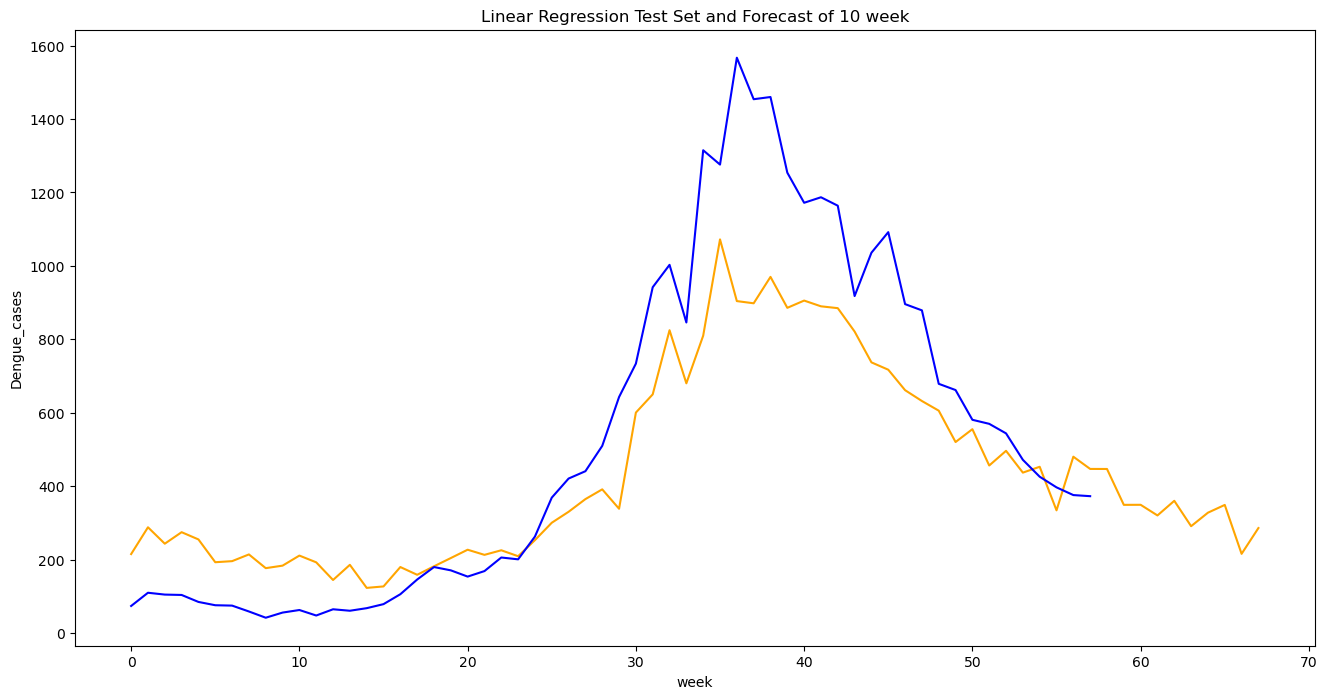

In [36]:
y_pred_lr_10week= model_lr.predict(df2X[504:572])

#plot
plt.figure(figsize=(16, 8))
plt.plot(y_pred_lr_10week,color='orange')
plt.plot(df3y[504:562],color='blue')
plt.title('Linear Regression Test Set and Forecast of 10 week')
plt.xlabel('week')
plt.ylabel('Dengue_cases')

### Lasso model

Mean Squared Error: 45930.98983160289
Root Mean Squared Error : 214.3151647261642
r2 score:0.7763943818033835
MAE: 161.12729365029213
[46.80777860461021, 0.7521284562272992, 9.161377020400172]


Text(0, 0.5, 'Dengue_cases')

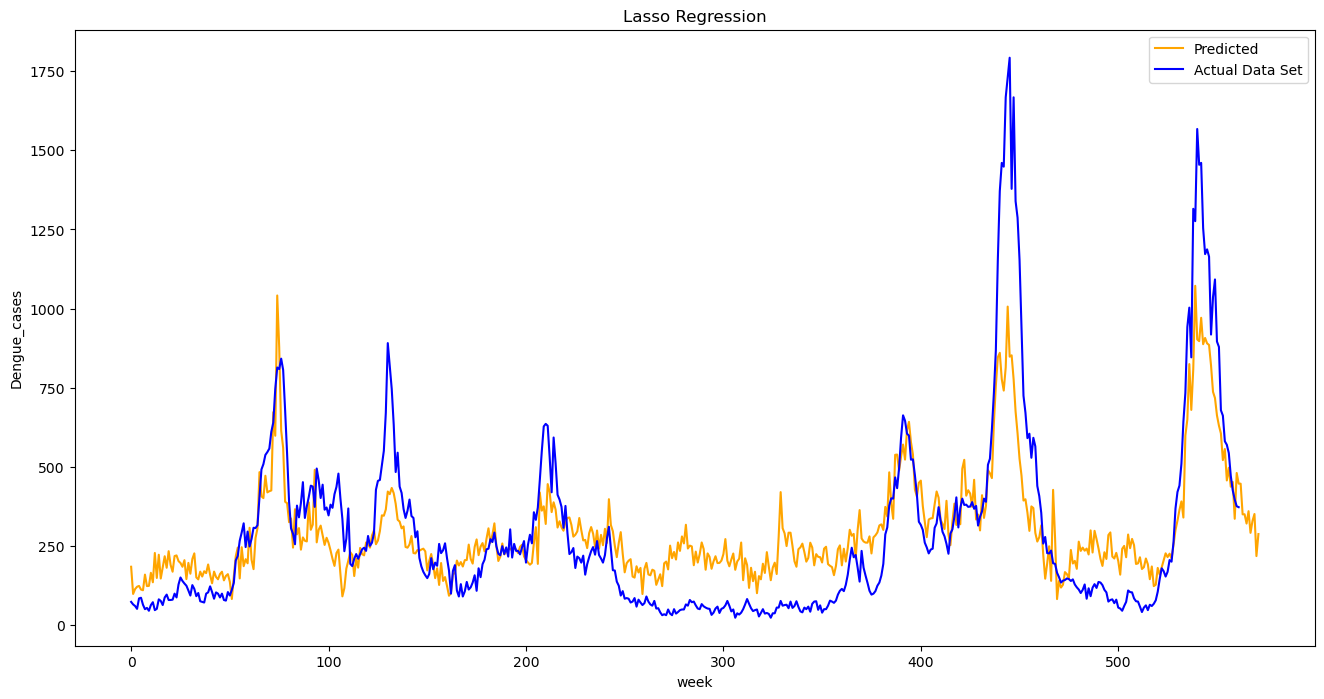

In [37]:
# Step 1 : Set columns for y and X

y = df['dengue_cases'].values.reshape(-1, 1)  # Input feature, reshaped to a 2D array
X = df[['mean_temperature','total_rainfall','interest']].values  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#X_test= test[['mean_temperature','total_rainfall', 'interest']].values
#y_test= test['dengue_cases'].values.reshape(-1, 1)

# Step 3: Create and train the linear regression model
model_lasso = Lasso()
model_lasso.fit(X_train, y_train)

df2X=df2[['mean_temperature','total_rainfall', 'interest']].values  # Target variable
df2y=df2['dengue_cases'].values.reshape(-1, 1)
df3y=df3['dengue_cases'].values.reshape(-1, 1)

# Step 4: Make predictions on the test set
y_pred_lasso = model_lasso.predict(df2X[504:562])

#predict on unseen data
y_pred_lasso_10week= model_lasso.predict(df2X[0:572])
#y_pred_lasso_10week_show = model_lasso.predict(df2X[552:572])
#print(y_pred_lasso_10week_show)

# Step 5: Evaluate the model
mse_lasso = mean_squared_error(df3y[504:562], y_pred_lasso)
print(f'Mean Squared Error: {mse_lasso}')

rmse_lasso= np.sqrt(mse_lasso)
print(f'Root Mean Squared Error : {rmse_lasso}')

r2_lasso = r2_score(df3y[504:562], y_pred_lasso)
print(f'r2 score:{r2_lr}')

mae_lasso = mean_absolute_error(df3y[504:562], y_pred_lasso)
print(f'MAE: {mae_lasso}')


#coef
coef_lasso=list(model_lasso.coef_)
print(coef_lasso)

#plot
actual_pred_plot(df3['dengue_cases'],y_pred_lasso_10week,)
plt.title('Lasso Regression')
plt.xlabel('week')
plt.ylabel('Dengue_cases')

Text(0, 0.5, 'Dengue_cases')

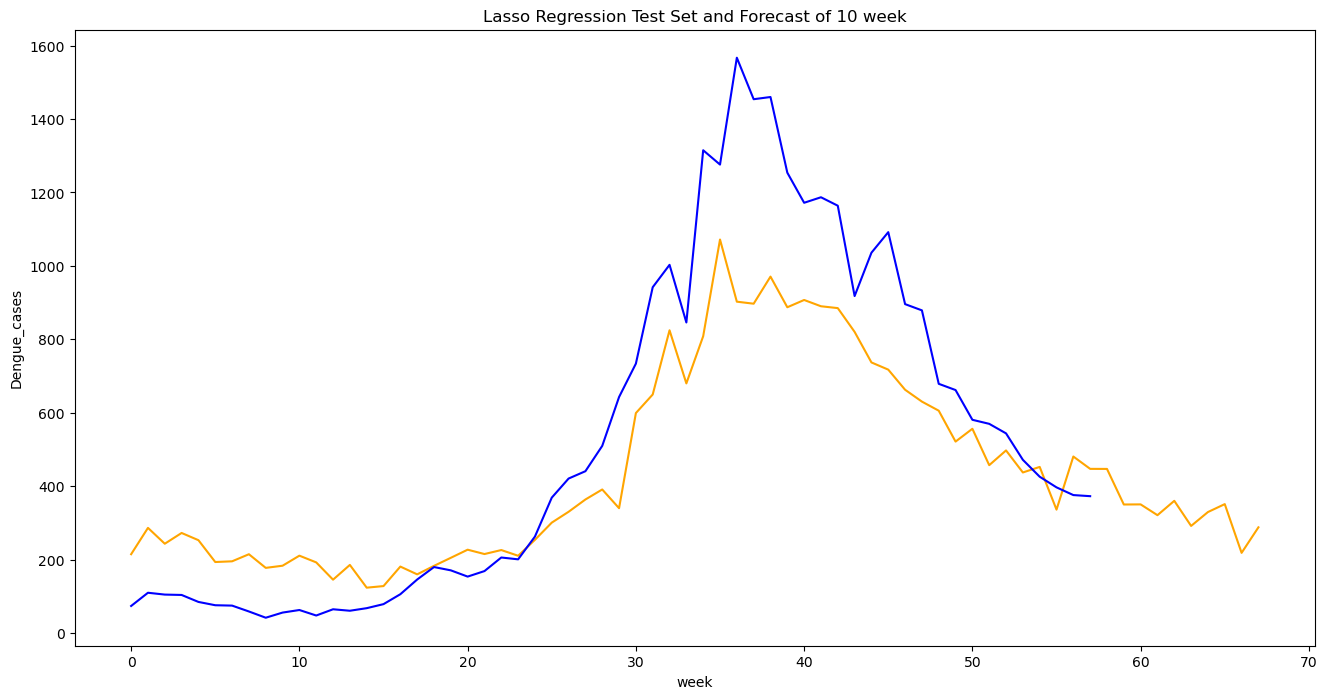

In [38]:
y_pred_lasso_10week= model_lasso.predict(df2X[504:572])

#plot
plt.figure(figsize=(16, 8))
plt.plot(y_pred_lasso_10week,color='orange')
plt.plot(df3y[504:562],color='blue')
plt.title('Lasso Regression Test Set and Forecast of 10 week')
plt.xlabel('week')
plt.ylabel('Dengue_cases')

### Ridge model

Mean Squared Error: 45919.848952622
Root Mean Squared Error : 214.28917133775565
r2 score:0.7763943818033835
MAE: 161.09958883955164
[array([48.32692099,  0.76567414,  9.14947537])]


Text(0, 0.5, 'Dengue_cases')

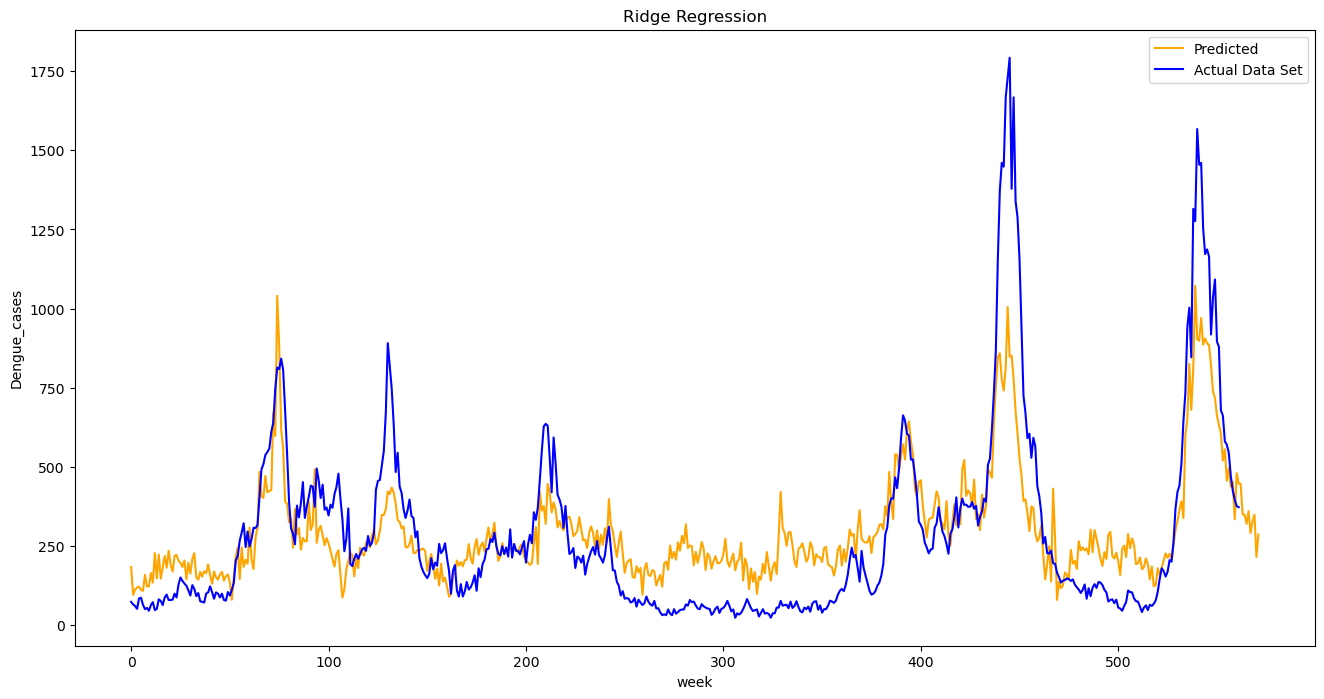

In [39]:
# Step 1 : Set columns for y and X
y = df['dengue_cases'].values.reshape(-1, 1)  # Input feature, reshaped to a 2D array
X = df[['mean_temperature','total_rainfall', 'interest']].values  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#X_test= test[['mean_temperature','total_rainfall', 'interest']].values
#y_test= test['dengue_cases'].values.reshape(-1, 1)

# Step 3: Create and train the linear regression model
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)

df2X=df2[['mean_temperature','total_rainfall', 'interest']].values  # Target variable
df2y=df2['dengue_cases'].values.reshape(-1, 1)
df3y=df3['dengue_cases'].values.reshape(-1, 1)

# Step 4: Make predictions on the test set
y_pred_ridge = model_ridge.predict(df2X[504:562])


#predict on unseen data
y_pred_ridge_10week= model_ridge.predict(df2X[0:572])

# Step 5: Evaluate the model
mse_ridge = mean_squared_error(df3y[504:562], y_pred_ridge)
print(f'Mean Squared Error: {mse_ridge}')

rmse_ridge= np.sqrt(mse_ridge)
print(f'Root Mean Squared Error : {rmse_ridge}')

r2_ridge = r2_score(df3y[504:562], y_pred_ridge)
print(f'r2 score:{r2_lr}')

mae_ridge = mean_absolute_error(df3y[504:562], y_pred_ridge)
print(f'MAE: {mae_ridge}')


#coef
coef=list(model_ridge.coef_)
print(coef)

#plot


actual_pred_plot(df3['dengue_cases'],y_pred_ridge_10week,)
plt.title('Ridge Regression')
plt.xlabel('week')
plt.ylabel('Dengue_cases')

Text(0, 0.5, 'Dengue_cases')

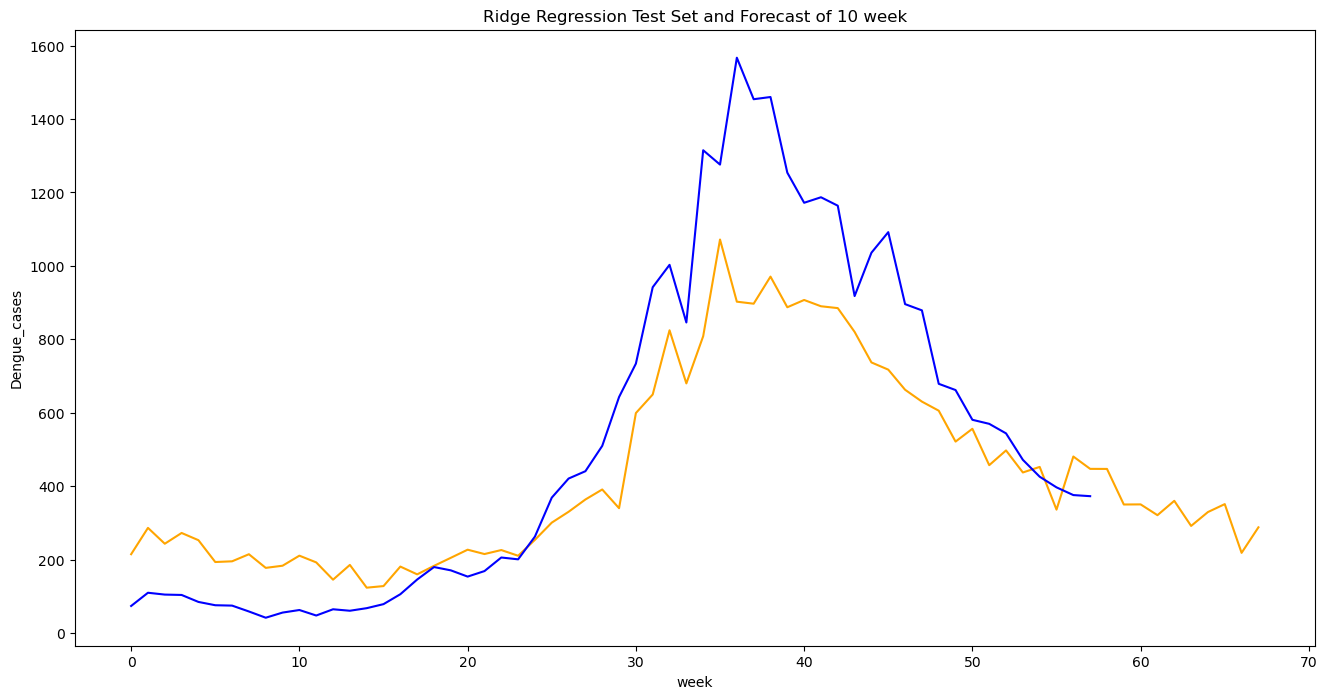

In [40]:
y_pred_ridge_10week= model_ridge.predict(df2X[504:572])

#plot
plt.figure(figsize=(16, 8))
plt.plot(y_pred_lasso_10week,color='orange')
plt.plot(df3y[504:562],color='blue')
plt.title('Ridge Regression Test Set and Forecast of 10 week')
plt.xlabel('week')
plt.ylabel('Dengue_cases')

Comment: The linear models are able to give a prediction with RMSE fo <300

### ARIMA MODEL

Testing ARIMA model with (1,0,0)

Mean Squared Error: 271064.86822429195
Root Mean Squared Error : 520.6389038712839


Text(0, 0.5, 'Dengue_cases')

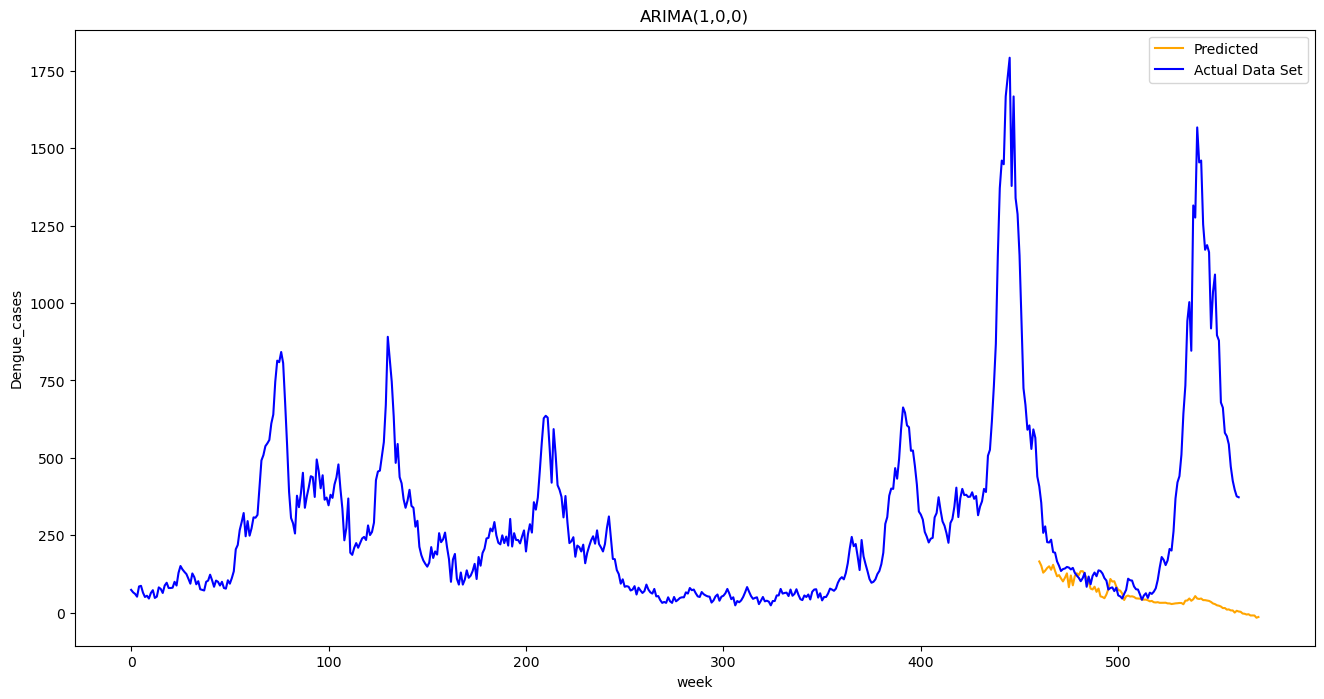

In [41]:
#Split the data into training and testing sets
train_data = df.iloc[:504]
test_data = df4.iloc[504:]

y = df['dengue_cases'].values.reshape(-1, 1)  # Input feature, reshaped to a 2D array
X = df[['mean_temperature','total_rainfall', 'interest']].values  # Target variable

# Define ARIMA model
model = ARIMA(endog=train_data['dengue_cases'],
              exog=train_data[['mean_temperature', 'total_rainfall', 'interest']], 
              order=(1, 0, 0))  # ARIMA order: (p, d, q)

# Fit ARIMA model
model_fit = model.fit()
predictions100 = model_fit.predict(start=460, 
                                 end=571,
                                 exog=test_data[['mean_temperature', 'total_rainfall', 'interest']])


# Step 5: Evaluate the model
#print MSE
mse = mean_squared_error(df3y[450:562], predictions100)
print(f'Mean Squared Error: {mse}')
rmse= np.sqrt(mse)
print(f'Root Mean Squared Error : {rmse}')



#plot
actual_pred_plot(df3['dengue_cases'],predictions100)
plt.title(f'ARIMA(1,0,0)')
plt.xlabel('week')
plt.ylabel('Dengue_cases')

Testing ARIMA model with (2,0,0)

Mean Squared Error: 271930.5899617532
Root Mean Squared Error : 521.4696443339278
AIC :5521.772906312541


Text(0, 0.5, 'Dengue_cases')

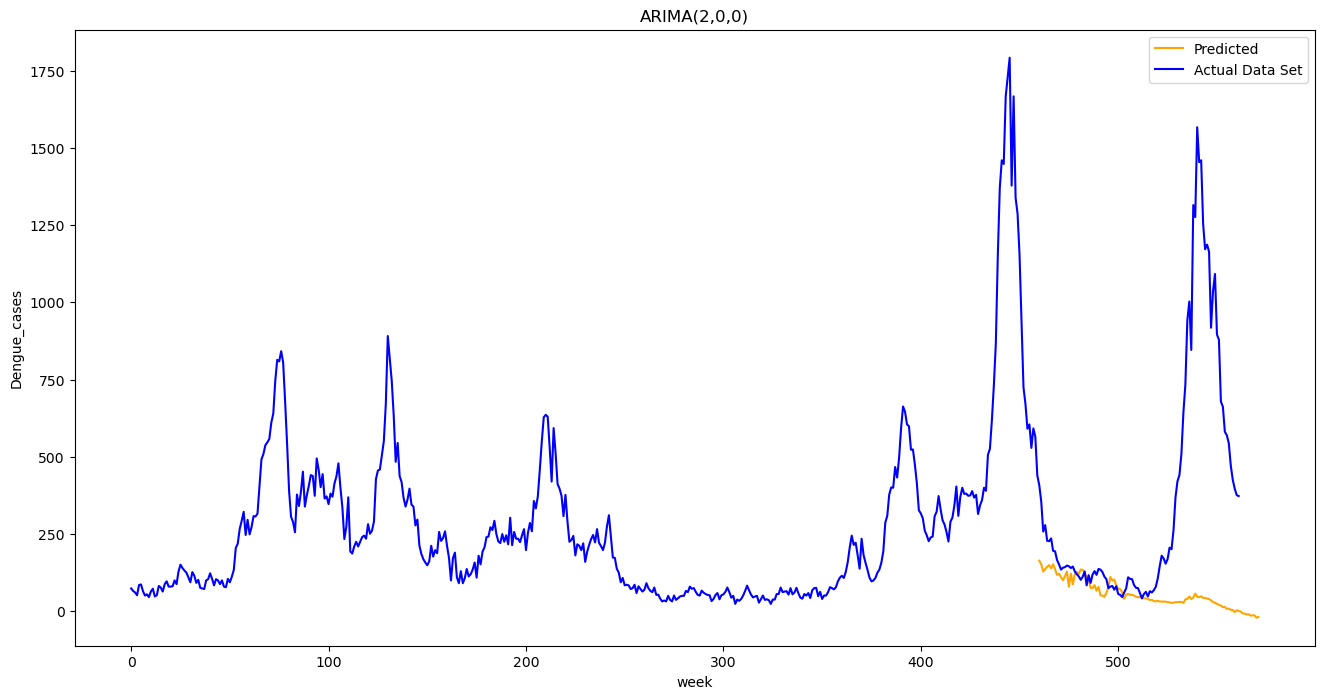

In [42]:
#Split the data into training and testing sets
train_data = df.iloc[:504]
test_data = df4.iloc[504:]

y = df['dengue_cases'].values.reshape(-1, 1)  # Input feature, reshaped to a 2D array
X = df[['mean_temperature','total_rainfall', 'interest']].values  # Target variable

# Define ARIMA model
model = ARIMA(endog=train_data['dengue_cases'],
              exog=train_data[['mean_temperature', 'total_rainfall', 'interest']], 
              order=(2, 0, 0))  # ARIMA order: (p, d, q)

# Fit ARIMA model
model_fit = model.fit()
predictions200 = model_fit.predict(start=460, 
                                 end=571,
                                 exog=test_data[['mean_temperature', 'total_rainfall', 'interest']])


# Step 5: Evaluate the model
#print MSE
mse = mean_squared_error(df3y[450:562], predictions200)
print(f'Mean Squared Error: {mse}')
rmse= np.sqrt(mse)
print(f'Root Mean Squared Error : {rmse}')
aic=model_fit.aic
print(f'AIC :{aic}')



#plot
actual_pred_plot(df3['dengue_cases'],predictions200)
plt.title(f'ARIMA(2,0,0)')
plt.xlabel('week')
plt.ylabel('Dengue_cases')

Testing ARIMA model with (2,1,0)

Mean Squared Error: 237570.88835365578
Root Mean Squared Error : 487.41244173046687
AIC :5451.719223032988


Text(0, 0.5, 'Dengue_cases')

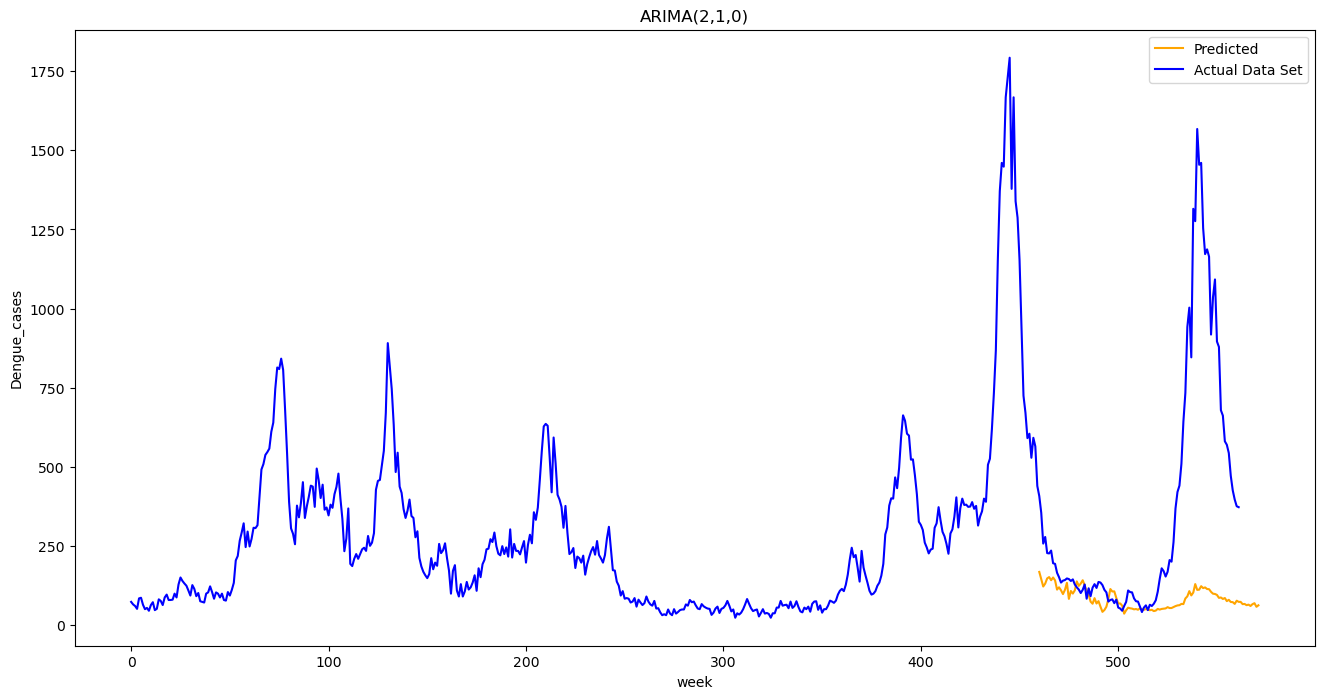

In [43]:
#Split the data into training and testing sets
train_data = df.iloc[:504]
test_data = df4.iloc[504:]

y = df['dengue_cases'].values.reshape(-1, 1)  # Input feature, reshaped to a 2D array
X = df[['mean_temperature','total_rainfall', 'interest']].values  # Target variable

# Define ARIMA model
model = ARIMA(endog=train_data['dengue_cases'],
              exog=train_data[['mean_temperature', 'total_rainfall', 'interest']], 
              order=(2, 1, 0))  # ARIMA order: (p, d, q)

# Fit ARIMA model
model_fit = model.fit()
predictions210 = model_fit.predict(start=460, 
                                 end=571,
                                 exog=test_data[['mean_temperature', 'total_rainfall', 'interest']])


# Step 5: Evaluate the model
#print MSE
mse = mean_squared_error(df3y[450:562], predictions210)
print(f'Mean Squared Error: {mse}')
rmse= np.sqrt(mse)
print(f'Root Mean Squared Error : {rmse}')
aic=model_fit.aic
print(f'AIC :{aic}')



#plot
actual_pred_plot(df3['dengue_cases'],predictions210)
plt.title(f'ARIMA(2,1,0)')
plt.xlabel('week')
plt.ylabel('Dengue_cases')

### Gird search for ARIMA model Parameters. By best rmse

In [44]:
#Split the data into training and testing sets
train_data = df.iloc[:504]
test_data = df4.iloc[504:]

# Define ARIMA model parameters to search
p = [0,1, 2, 3]
d = [0, 1, 2]
q = [0, 1, 2]
params = list(product(p, d, q))

#train_data = df.iloc[:504]
#test_data = df.iloc[504:]


# Grid search to find optimal ARIMA model parameters
best_rmse = float('inf')
best_order = None
for param in params:
    try:
        model = ARIMA(endog=train_data['dengue_cases'], 
                      exog=train_data[['mean_temperature', 'total_rainfall', 'interest']], 
                      order=param)  # ARIMA order: (p, d, q)
        model_fit = model.fit()
        predictions = model_fit.predict(start=504, 
                                        end=571, 
                                        exog=test_data[['mean_temperature', 'total_rainfall', 'interest']])
        mse = mean_squared_error(test_data['dengue_cases'], predictions)
        rmse = np.sqrt(mse)
        if rmse < best_rmse:
            best_rmse = rmse
            best_order = param
        print(f' best rmse {rmse}')
    except:
        continue

# Fit ARIMA model with best parameters
best_model = ARIMA(endog=train_data['dengue_cases'], 
                   exog=train_data[['mean_temperature', 'total_rainfall', 'interest']], 
                   order=best_order)
best_model_fit = best_model.fit()

# Make predictions with best model
predictions = best_model_fit.predict(start=470, 
                                      end=571, 
                                      exog=test_data[['mean_temperature', 'total_rainfall', 'interest']])

# Print best model parameters and predictions
print("Best ARIMA Order: ", best_order)
print("Predictions: ", predictions)

#mse = mean_squared_error(test_data['dengue_cases'], predictions)
#print(f'model mse: {mse}')

 best rmse 211.6092738254025
 best rmse 273.96936959149036
 best rmse 335.2838705453046
 best rmse 596.1068688055803
 best rmse 594.1798102762742
 best rmse 586.2289221862977
 best rmse 384.02754334256105
 best rmse 688.5914516610087
 best rmse 750.285819007569
 best rmse 627.5649289621484
 best rmse 627.5832910485176
 best rmse 599.4678470716793
 best rmse 592.9087090089873
 best rmse 591.3288225849863
 best rmse 590.1750973056792
 best rmse 562.1540965532382
 best rmse 743.3410126401347
 best rmse 733.1490501940814
 best rmse 627.7321101620779
 best rmse 607.1895541603021
 best rmse 624.1164191737483
 best rmse 581.195950869889
 best rmse 589.4474074024323
 best rmse 590.3653240530574
 best rmse 682.211078602167
 best rmse 582.6708543528604
 best rmse 738.0972458152685
 best rmse 648.7650776772256
 best rmse 669.0670471472978
 best rmse 638.05861622474
 best rmse 589.2179766642791
 best rmse 590.3516970483564
 best rmse 532.1566377597177
 best rmse 712.2572944982245
 best rmse 591.10

Fit best RMSE grid search ARIMA model

Mean Squared Error: 117262.28222119475
Root Mean Squared Error : 342.4358074460011
AIC :6894.883937541816


Text(0, 0.5, 'Dengue_cases')

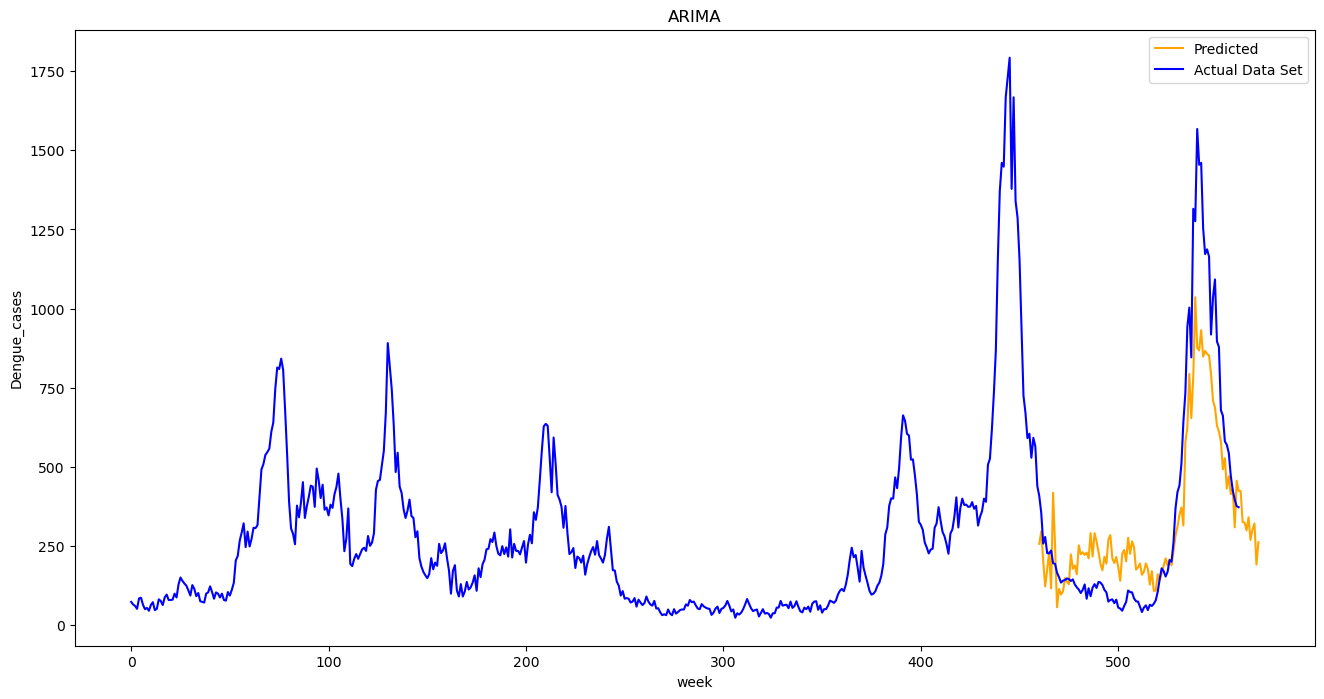

In [45]:
# Define ARIMA model best rmse parameter(0,0,1)
#Split the data into training and testing sets
train_data = df.iloc[:504]
test_data = df4.iloc[504:]


# Define ARIMA model
model = ARIMA(endog=train_data['dengue_cases'],
              exog=train_data[['mean_temperature', 'total_rainfall', 'interest']], 
              order=(0, 0, 0))  # ARIMA order: (p, d, q)

# Fit ARIMA model
model_fit = model.fit()
predictions000 = model_fit.predict(start=460, 
                                 end=571,
                                 exog=test_data[['mean_temperature', 'total_rainfall', 'interest']])


# Step 5: Evaluate the model
#print MSE
mse_000 = mean_squared_error(df3y[450:562], predictions000)
print(f'Mean Squared Error: {mse_000}')
rmse_000= np.sqrt(mse_000)
print(f'Root Mean Squared Error : {rmse_000}')
aic=model_fit.aic
print(f'AIC :{aic}')



#plot
actual_pred_plot(df3['dengue_cases'],predictions000)
plt.title(f'ARIMA')
plt.xlabel('week')
plt.ylabel('Dengue_cases')

The ARIMA(0, 0, 0) model with all zero components represents a White Noise model with independent and identically distributed data.

### Gird search for ARIMA model Parameters. by best AIC

In [46]:
# Starting AIC, p, and q.
best_aic = 99 * (10 ** 16)
best_d = 0
best_p = 0
best_q = 0

# Use nested for loop to iterate over values of p and q.
for p in range(5):
    for q in range(5):
        for d in range(5):
                    try:
            
                        # Fitting an ARIMA(p, d, q) model.
                        print(f'Attempting ARIMA({p}, {d}, {q})')

                        # Instantiate ARIMA model.
                        arima = ARIMA(endog=train_data['dengue_cases'], 
                                      exog=train_data[['mean_temperature', 'total_rainfall', 'searches']], 
                                      order=(p, d, q))


                        # Fit ARIMA model.
                        model = arima.fit()#disp=False)

                        # Print out AIC for ARIMA(p, d, q) model.
                        print(f'The AIC for ARIMA({p},{d},{q}) is: {model.aic}')

                        # Is my current model's AIC better than our best_aic?
                        if model.aic < best_aic:

                            # If so, let's overwrite best_aic, best_p, and best_q.
                            best_aic = model.aic
                            best_p = p
                            best_q = q
                            best_d = d


                    except:
                        pass
            

#print()
#print()
print('MODEL FINISHED!')

print(f'Our model that minimizes AIC on the training data is the ARIMA({best_p},1,{best_q}).')
print(f'This model has an AIC of {best_aic}.')

Attempting ARIMA(0, 0, 0)
Attempting ARIMA(0, 1, 0)
Attempting ARIMA(0, 2, 0)
Attempting ARIMA(0, 3, 0)
Attempting ARIMA(0, 4, 0)
Attempting ARIMA(0, 0, 1)
Attempting ARIMA(0, 1, 1)
Attempting ARIMA(0, 2, 1)
Attempting ARIMA(0, 3, 1)
Attempting ARIMA(0, 4, 1)
Attempting ARIMA(0, 0, 2)
Attempting ARIMA(0, 1, 2)
Attempting ARIMA(0, 2, 2)
Attempting ARIMA(0, 3, 2)
Attempting ARIMA(0, 4, 2)
Attempting ARIMA(0, 0, 3)
Attempting ARIMA(0, 1, 3)
Attempting ARIMA(0, 2, 3)
Attempting ARIMA(0, 3, 3)
Attempting ARIMA(0, 4, 3)
Attempting ARIMA(0, 0, 4)
Attempting ARIMA(0, 1, 4)
Attempting ARIMA(0, 2, 4)
Attempting ARIMA(0, 3, 4)
Attempting ARIMA(0, 4, 4)
Attempting ARIMA(1, 0, 0)
Attempting ARIMA(1, 1, 0)
Attempting ARIMA(1, 2, 0)
Attempting ARIMA(1, 3, 0)
Attempting ARIMA(1, 4, 0)
Attempting ARIMA(1, 0, 1)
Attempting ARIMA(1, 1, 1)
Attempting ARIMA(1, 2, 1)
Attempting ARIMA(1, 3, 1)
Attempting ARIMA(1, 4, 1)
Attempting ARIMA(1, 0, 2)
Attempting ARIMA(1, 1, 2)
Attempting ARIMA(1, 2, 2)
Attempting A

Fit best AIC grid search ARIMA model

Mean Squared Error: 245246.4462590706
Root Mean Squared Error : 495.2236325732755
AIC :5500.17575163513


Text(0, 0.5, 'Dengue_cases')

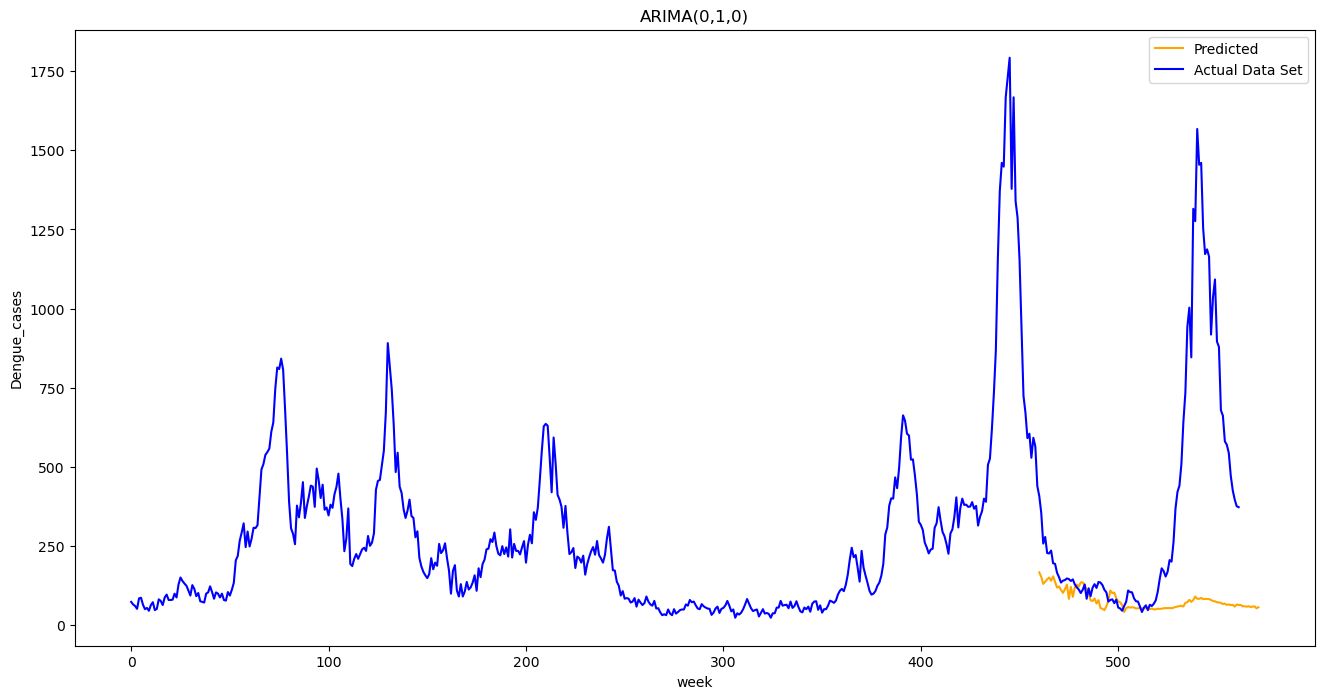

In [47]:
# Define ARIMA model best rmse parameter(0,1,0)
#Split the data into training and testing sets
train_data = df.iloc[:504]
test_data = df4.iloc[504:]


# Define ARIMA model
model = ARIMA(endog=train_data['dengue_cases'],
              exog=train_data[['mean_temperature', 'total_rainfall', 'interest']], 
              order=(0, 1, 0))  # ARIMA order: (p, d, q)

# Fit ARIMA model
model_fit = model.fit()
predictions010 = model_fit.predict(start=460, 
                                 end=571,
                                 exog=test_data[['mean_temperature', 'total_rainfall', 'interest']])


# Step 5: Evaluate the model
#print MSE
mse = mean_squared_error(df3y[450:562], predictions010)
print(f'Mean Squared Error: {mse}')
rmse= np.sqrt(mse)
print(f'Root Mean Squared Error : {rmse}')
aic=model_fit.aic
print(f'AIC :{aic}')



#plot
actual_pred_plot(df3['dengue_cases'],predictions010)
plt.title(f'ARIMA(0,1,0)')
plt.xlabel('week')
plt.ylabel('Dengue_cases')

### Check for seasonality 

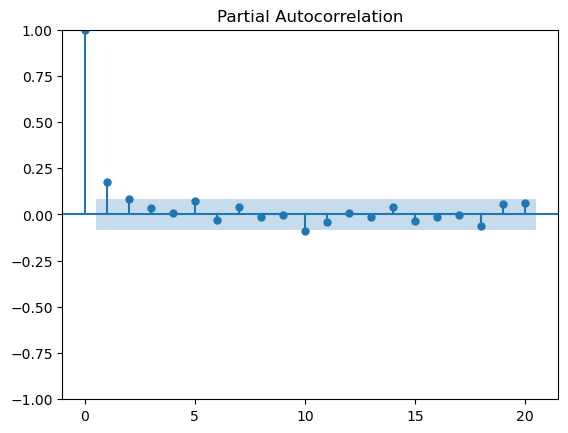

In [48]:
plot_pacf(df['total_rainfall'],lags=20);

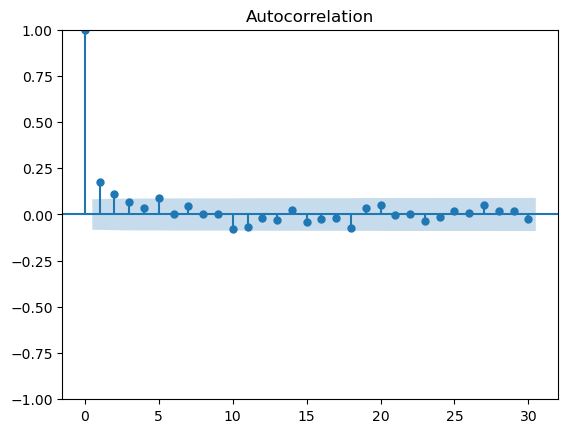

In [49]:
plot_acf(df['total_rainfall'],lags=30);

no seasonality is found

### Fit SARIMA Model

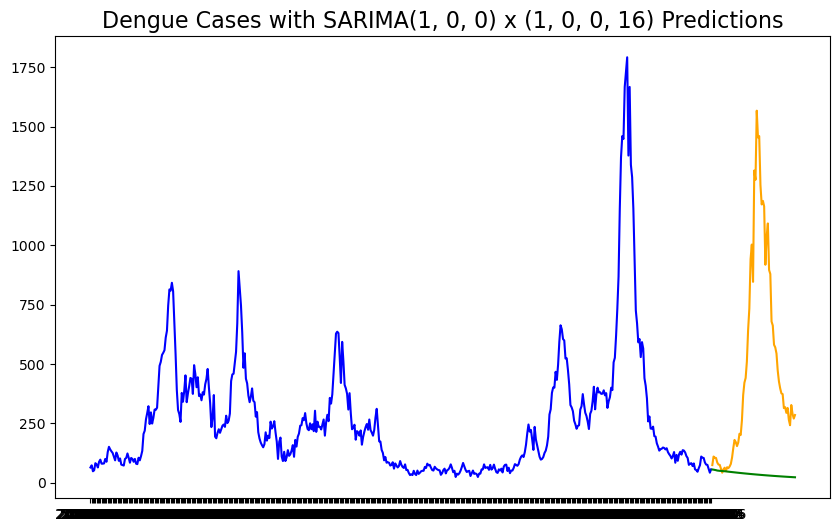

In [50]:
# Fit a SARIMA(1, 0, 0) x (1, 0, 0, 13) model.
train_data = df.iloc[:504]
test_data = df4.iloc[504:]

#Split the data into training and testing sets

sarima = SARIMAX(endog = train_data['dengue_cases'],
                 order = (1, 0, 0),              # (p, d, q)
                 seasonal_order = (1, 0, 0, 13)) # (P, D, Q, S)

# Fit SARIMA model.
model = sarima.fit(disp=False)

# Generate predictions based on test set.
preds = model.predict(start=len(train_data), 
                              end=len(train_data) + len(test_data) - 1,)

# Evaluate predictions.
#print(mean_squared_error(test['dengue_cases'], preds))

# Plot data.
plt.figure(figsize=(10,6))
plt.plot(train_data['dengue_cases'], color = 'blue')
plt.plot(test_data['dengue_cases'], color = 'orange')
plt.plot(preds, color = 'green')
plt.title(label = 'Dengue Cases with SARIMA(1, 0, 0) x (1, 0, 0, 16) Predictions', fontsize=16)
plt.show();

Try search for best parameter for SARIMAX

In [51]:
def sarimax(ts,exo,all_param):
    results = []
    for param in all_param:
        try:
            mod = SARIMAX(ts,
                          exog = exo,
                          order=param[0],
                          seasonal_order=param[1])
            res = mod.fit()
            results.append((res,res.aic,param))
            print('Tried out SARIMAX{}x{} - AIC:{}'.format(param[0], param[1], round(res.aic,2)))
        except Exception as e:
            print(e)
            continue
            
    return results

# set parameter range
p,d,q = range(1,3),[1],range(1,3)
P,D,Q,s = range(0,3),[1],range(0,3),[30]
# list of all parameter combos
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q, s))
all_param = list(itertools.product(pdq,seasonal_pdq))

all_res = sarimax(train_data['dengue_cases'],train_data[['mean_temperature', 'total_rainfall', 'interest']],all_param)

Tried out SARIMAX(1, 1, 1)x(0, 1, 0, 30) - AIC:5503.8
Tried out SARIMAX(1, 1, 1)x(0, 1, 1, 30) - AIC:5264.29
Tried out SARIMAX(1, 1, 1)x(0, 1, 2, 30) - AIC:5234.04
Tried out SARIMAX(1, 1, 1)x(1, 1, 0, 30) - AIC:5367.59
Tried out SARIMAX(1, 1, 1)x(1, 1, 1, 30) - AIC:5261.86
Tried out SARIMAX(1, 1, 1)x(1, 1, 2, 30) - AIC:5235.93
Tried out SARIMAX(1, 1, 1)x(2, 1, 0, 30) - AIC:5291.89
Tried out SARIMAX(1, 1, 1)x(2, 1, 1, 30) - AIC:5261.76
Tried out SARIMAX(1, 1, 1)x(2, 1, 2, 30) - AIC:5261.93
Tried out SARIMAX(1, 1, 2)x(0, 1, 0, 30) - AIC:5483.52
Tried out SARIMAX(1, 1, 2)x(0, 1, 1, 30) - AIC:5204.38
Tried out SARIMAX(1, 1, 2)x(0, 1, 2, 30) - AIC:5204.33
Tried out SARIMAX(1, 1, 2)x(1, 1, 0, 30) - AIC:5346.44
Tried out SARIMAX(1, 1, 2)x(1, 1, 1, 30) - AIC:5204.5
Tried out SARIMAX(1, 1, 2)x(1, 1, 2, 30) - AIC:5205.77
Tried out SARIMAX(1, 1, 2)x(2, 1, 0, 30) - AIC:5264.11
Tried out SARIMAX(1, 1, 2)x(2, 1, 1, 30) - AIC:5203.14
Tried out SARIMAX(1, 1, 2)x(2, 1, 2, 30) - AIC:5206.95
Tried out SA

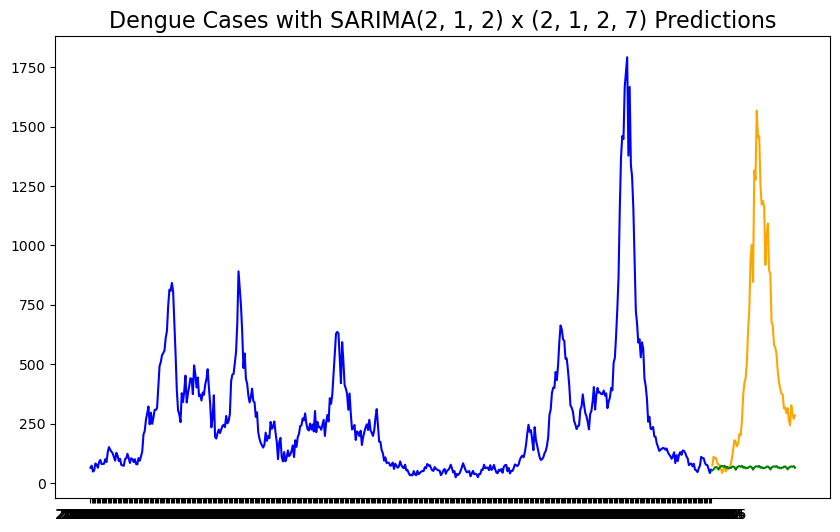

In [52]:
# Fit a SARIMA(1, 0, 0) x (1, 0, 0, 13) model.

sarima = SARIMAX(endog = train_data['dengue_cases'],
                 order = (2, 1, 2),              # (p, d, q)
                 seasonal_order = (2, 1, 2, 7)) # (P, D, Q, S)

# Fit SARIMA model.
model = sarima.fit(disp=False)

# Generate predictions based on test set.
preds = model.predict(start=len(train_data), 
                              end=len(train_data) + len(test_data) - 1,)

# Evaluate predictions.
#print(mean_squared_error(test['dengue_cases'], preds))

# Plot data.
plt.figure(figsize=(10,6))
plt.plot(train_data['dengue_cases'], color = 'blue')
plt.plot(test_data['dengue_cases'], color = 'orange')
plt.plot(preds, color = 'green')
plt.title(label = 'Dengue Cases with SARIMA(2, 1, 2) x (2, 1, 2, 7) Predictions', fontsize=16)
plt.show();

Comment: The linear models (Lasso, Ridge, Linear) performs better than ARIMA. This may be due to the lack of clear seanonality of dengue cases